In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# C:/Windows/Fonts/H2GSRB.TTF
import matplotlib as mp
import matplotlib.font_manager as fm
import os
location = 'C:/Windows/Fonts/H2GSRB.TTF'
font_name = fm.FontProperties(fname=location).get_name()
mp.rc('font',family=font_name)

In [29]:
# 데이터 준비하기
filelists = ['./data/'+i for i in os.listdir('./data')]
seoul_locations = [i.split('_')[1] for i in filelists]

In [41]:
df_lists = [pd.read_csv(i,encoding='cp949',index_col=0) for i in filelists]
result = []
for idx,value in enumerate(df_lists):    
    value['지역'] = seoul_locations[idx]
    result.append(value)
    

In [42]:
df = pd.concat(result)

<AxesSubplot:>

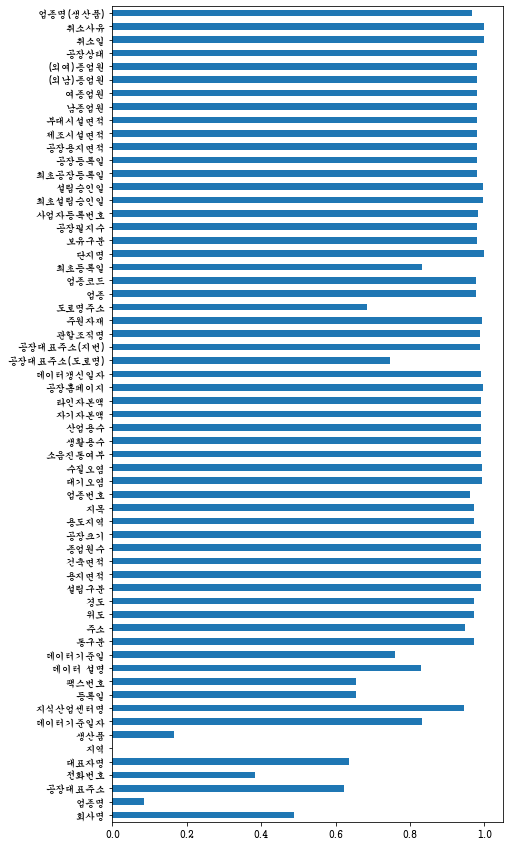

In [43]:
df.isna().mean().plot.barh(figsize=(7,15))

In [72]:
# 업종명,주소,회사명
find_cols = ['업종','주소','회사','생산','지역']
df.columns[ df.columns.str.contains('업종명')]

Index(['업종명', '업종명(생산품)'], dtype='object')

In [122]:
df_cols = [df.columns[ df.columns.str.contains(i)].to_list() for i in find_cols]
df_cols

[['업종명', '업종번호', '업종', '업종코드', '업종명(생산품)'],
 ['공장대표주소', '주소', '공장대표주소(도로명)', '공장대표주소(지번)', '도로명주소'],
 ['회사명'],
 ['생산품', '업종명(생산품)'],
 ['지역', '용도지역']]

In [123]:
# 파이썬에서 2차원리스트를 1차원으로 변경
# 중복을 제거하기 위해  set으로 리스트를 치환한다음 다시 라스트로 원복
df_cols =  sum(df_cols,[])
df_cols = list(set(df_cols))
df_cols

['지역',
 '용도지역',
 '업종명',
 '공장대표주소',
 '업종명(생산품)',
 '도로명주소',
 '회사명',
 '업종번호',
 '업종',
 '주소',
 '공장대표주소(지번)',
 '업종코드',
 '생산품',
 '공장대표주소(도로명)']

<AxesSubplot:>

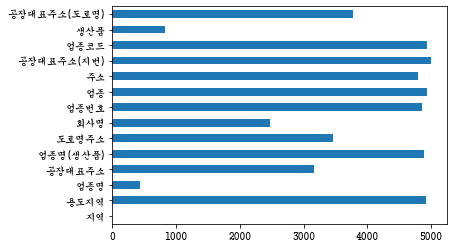

In [165]:
# 원하는 컬럼들의 결측치 시각화
df2 = df.loc[:,df_cols].copy()
df2.isna().sum().plot.barh()

In [166]:
df2.reset_index(drop=True,inplace=True)

In [167]:
# 업종명이 null인 데이터 중에서 생산품이 있는 데이터
index = df2[df2['업종명'].isna()].index
truefalse_index = df2.loc[index]['생산품'].isna() == False
index = df2.loc[index][truefalse_index].index
df2.loc[index,'업종명'] = df2.loc[index,'생산품']

In [168]:
# 업종명이 null인 데이터 중에서 업종명(생산품) 있는 데이터
index = df2[df2['업종명'].isna()].index
truefalse_index = df2.loc[index]['업종명(생산품)'].isna() == False
truefalse_index
index = df2.loc[index][truefalse_index].index
df2.loc[index,'업종명'] = df2.loc[index,'업종명(생산품)']

In [169]:
df2[df2['업종명'].isna()]

,지역,용도지역,업종명,공장대표주소,업종명(생산품),도로명주소,회사명,업종번호,업종,주소,공장대표주소(지번),업종코드,생산품,공장대표주소(도로명)
1527,동작구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
df2.drop(index=1527,inplace=True)

<AxesSubplot:>

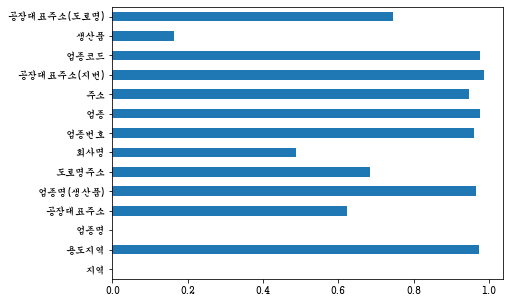

In [171]:
df2.isna().mean().plot.barh(figsize=(7,5))

In [172]:
# df3 = df2[df2.columns[df2.columns.str.contains('주소')]].copy()
temp = df2[df2['공장대표주소'].isna()]
index = temp[temp['주소'].isna() == False].index
df2.loc[index,'공장대표주소'] = df2.loc[index,'주소']

In [173]:
temp = df2[df2['공장대표주소'].isna()]
index = temp[temp['공장대표주소(도로명)'].isna() == False].index
df2.loc[index,'공장대표주소'] = df2.loc[index,'공장대표주소(도로명)']

In [174]:
temp = df2[df2['공장대표주소'].isna()]
index = temp[temp['도로명주소'].isna() == False].index
df2.loc[index,'공장대표주소'] = df2.loc[index,'도로명주소']

In [175]:
df2[df2['공장대표주소'].isna()]

,지역,용도지역,업종명,공장대표주소,업종명(생산품),도로명주소,회사명,업종번호,업종,주소,공장대표주소(지번),업종코드,생산품,공장대표주소(도로명)
4828,중랑구,NaN,가방 및 기타 보호용 케이스 제조업 외 4 종,NaN,NaN,NaN,가방클럽닷컴,NaN,NaN,NaN,NaN,NaN,가방,NaN


In [176]:
df2.drop(index=4828,inplace=True)

In [177]:
df2.reset_index(drop=True,inplace=True)

<AxesSubplot:>

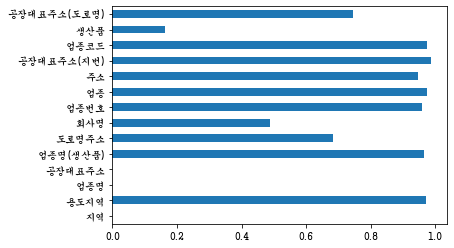

In [178]:
df2.isna().mean().plot.barh()

In [179]:
df3= df2[['지역','업종명','공장대표주소']].copy()

In [180]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5063 entries, 0 to 5062
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      5063 non-null   object
 1   업종명     5063 non-null   object
 2   공장대표주소  5063 non-null   object
dtypes: object(3)
memory usage: 118.8+ KB


In [182]:
df3.to_csv('seroul_factory.csv',encoding='cp949',index=False)

In [183]:
df3 = pd.read_csv('seroul_factory.csv',encoding='cp949')
df3.head()

,지역,업종명,공장대표주소
0,강동구,간판 및 광고물 제조업 외 1 종,서울특별시 강동구 상일로 31 (상일동)
1,강동구,기타 주변기기 제조업 외 2 종,서울특별시 강동구 성내동 397-10번지 지하1층
2,강동구,속도계 및 적산계기 제조업,"서울특별시 강동구 양재대로103길 5, 지층 (성내동)"
3,강동구,시계 및 시계부품 제조업 외 2 종,"서울특별시 강동구 동남로53길 6, 2층 (둔촌동)"
4,강동구,귀금속 및 관련제품 제조업,"서울특별시 강동구 천중로 206, 2층 (길동)"


<AxesSubplot:xlabel='count', ylabel='업종명'>

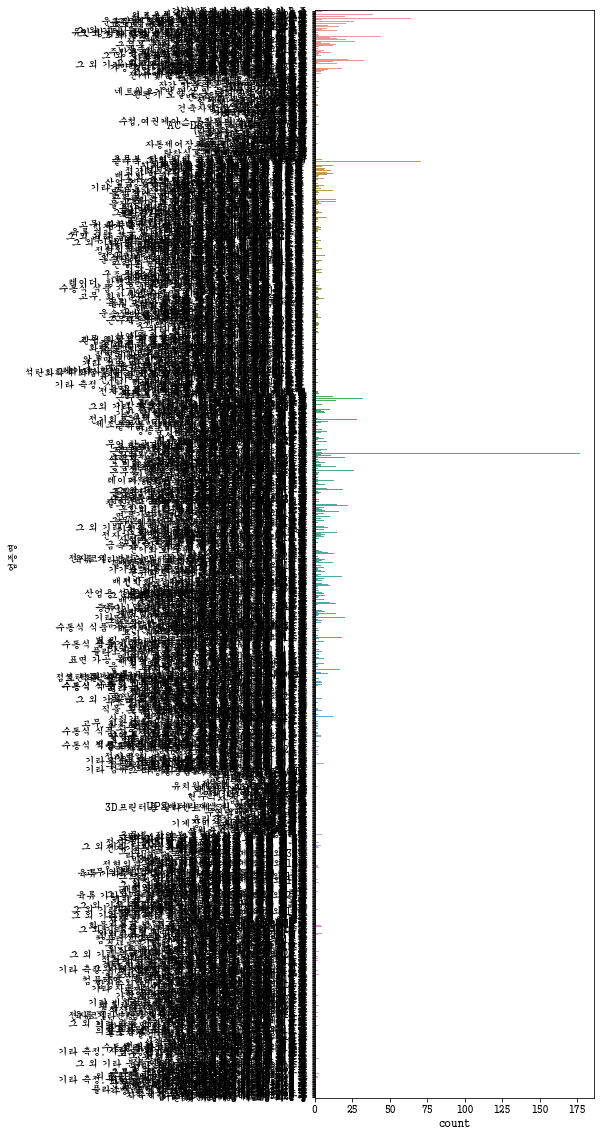

In [184]:
plt.figure(figsize=(5,20))
sns.countplot(data=df3,y='업종명')

In [194]:
# df3['업종명'].value_counts() > 5
temp_seri = df3['업종명'].value_counts()
index_5 = temp_seri[temp_seri > 5].index
index_5

Index(['기타 인쇄업 외 1 종', '배전반 및 전기 자동제어반 제조업', ' 주형 및 금형 제조업 ', '간판 및 광고물 제조업',
       '일반용 전기 조명장치 제조업', '그 외 기타 의료용 기기 제조업', '귀금속 및 관련제품 제조업', '경 인쇄업 외 1 종',
       '컴퓨터 제조업', '구두류 제조업',
       ...
       '간판 및 광고물 제조업 외 5 종', '방송장비 제조업 외 5 종', '유선 통신장비 제조업 외 3 종', '오프셋 인쇄업',
       ' 탭, 밸브 및 유사장치 제조업 ', '교통 신호장치 제조업 외 1 종', '배전반 및 전기 자동제어반 제조업 외 1 종',
       '도시락류 제조업 외 1 종', '건설 및 채광용 기계장비 제조업', '합성수지 및 기타 플라스틱 물질 제조업'],
      dtype='object', length=178)

In [232]:
df_5 =  df3[df3['업종명'].isin(index_5)].copy()
df_5['업종명'].value_counts()

기타 인쇄업 외 1 종          177
배전반 및 전기 자동제어반 제조업     73
 주형 및 금형 제조업           71
간판 및 광고물 제조업           68
일반용 전기 조명장치 제조업        64
                     ... 
오프셋 인쇄업                 6
방송장비 제조업 외 5 종          6
 남자용 겉옷 제조업 외 4 종       6
방송장비 제조업 외 4 종          6
교통 신호장치 제조업 외 1 종       6
Name: 업종명, Length: 178, dtype: int64

<AxesSubplot:xlabel='count', ylabel='업종명'>

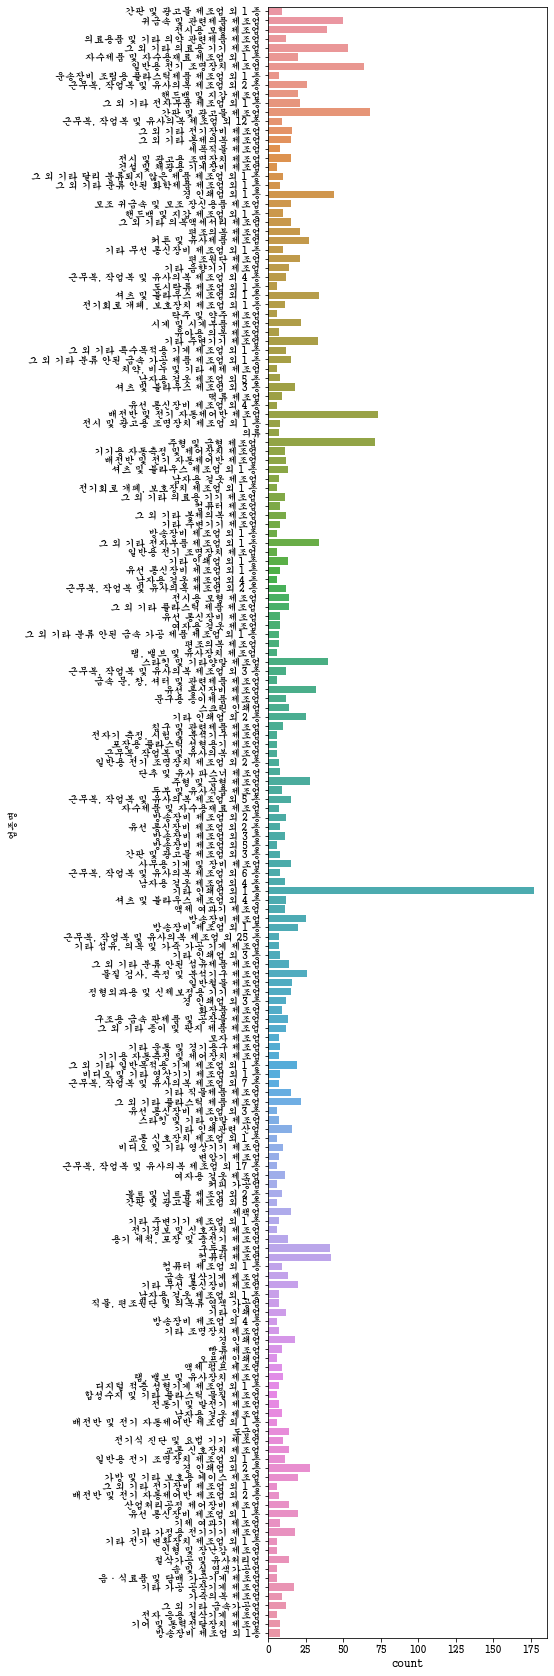

In [212]:
plt.figure(figsize=(5,30))
sns.countplot(data=df_5,y='업종명')

In [263]:
#그 외를 제외한 업종명
df_5.reset_index(drop=True,inplace=True)
temp_index =  df_5['업종명'][df_5['업종명'].str.contains('그 외|그외')==False]
index = df_5[df_5['업종명'].isin(temp_index.values)].index
df_5.loc[index,'업종명'].str.contains('그 외|그외').sum()
# df_5[df_5.loc[index,'업종명'].str.contains('그 외|그외')]


Int64Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
            ...
            2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2702],
           dtype='int64', length=2375)


0

In [203]:
# '외' 가 들어간 문자열의 앞자리만 추출
str1 = '방송장비 제조업 외 1종'
str1[:str1.find('외')].strip()

'방송장비 제조업'

In [264]:
df_5.loc[index,'업종명'] = df_5.loc[index,'업종명'].apply(lambda x: x[:x.find('외')].strip())

In [265]:
df_5['업종명'].value_counts()

기타 인쇄업                  223
근무복, 작업복 및 유사의복 제조업     114
경 인쇄업                    84
셔츠 및 블라우스 제조업            77
배전반 및 전기 자동제어반 제조        73
                       ... 
전자기 측정, 시험 및 분석기구 제조      6
근무복, 작업복 및 유사의복 제조        6
전기경보 및 신호장치 제조            6
커피 가공                     6
포장용 플라스틱 성형용기 제조          6
Name: 업종명, Length: 137, dtype: int64

<AxesSubplot:xlabel='count', ylabel='업종명'>

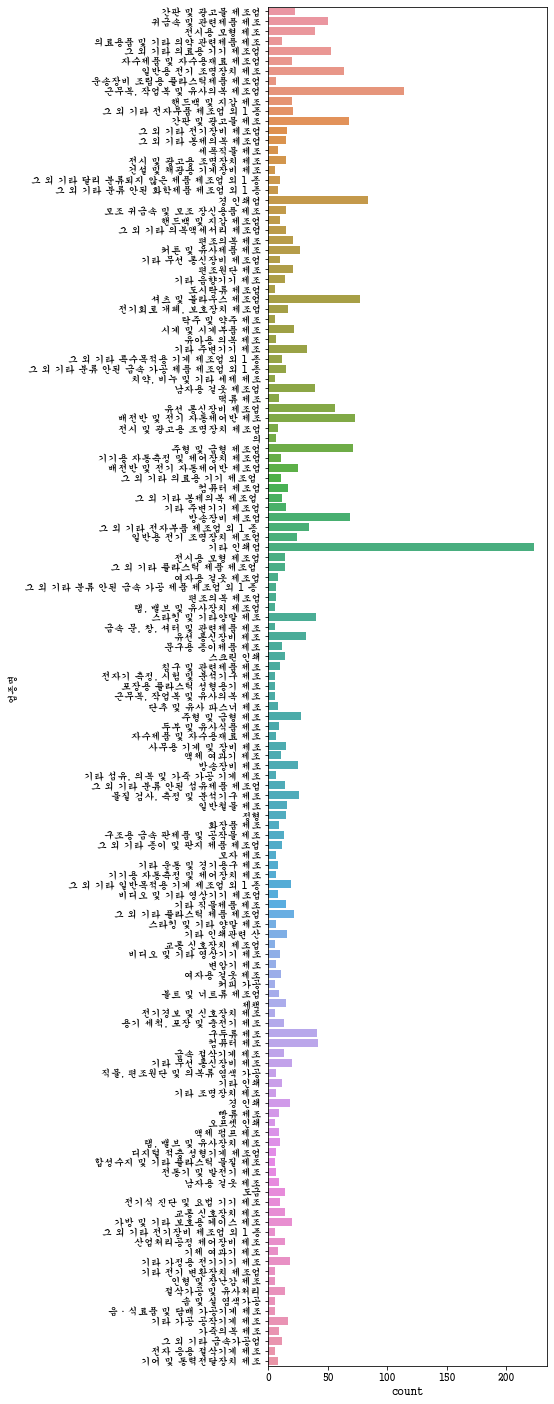

In [267]:
plt.figure(figsize=(5,25))
sns.countplot(data=df_5,y='업종명')

In [12]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from geopy.geocoders import Nominatim

In [2]:
from geopy.geocoders import Nominatim
def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd
geocoding('서울특별시 강동구 상일로 31')

In [9]:
geocoding('서울특별시 강동구 양재대로103길 5')

{'lat': '37.5335625', 'lng': '127.1352089'}